# Загрузка данных

In [ ]:
import pandas as pd
data = pd.read_csv('/content/netflix_users_data.csv')

In [ ]:
data

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


# Приведение столбцов к стилю camel_case

In [ ]:
import re

In [ ]:
def to_camel_case(s: str) -> str:
    # Убираем лишние пробелы по краям и приводим к нижнему регистру слова
    parts = re.split(r'\s+|_', s.strip())
    # Первое слово в нижнем регистре, остальные с заглавной буквы
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

In [ ]:
# Преобразуем названия колонок
data.columns = [to_camel_case(col) for col in data.columns]

print(data.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


# Приведение типов данных

In [ ]:
#приведение даты к типу datetime
date_columns = ['joinDate', 'lastPaymentDate']

for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [ ]:
# Проверим типы
print(data.dtypes)

userId                       int64
subscriptionType            object
monthlyRevenue               int64
joinDate            datetime64[ns]
lastPaymentDate     datetime64[ns]
country                     object
age                          int64
gender                      object
device                      object
planDuration                object
dtype: object


# Поиск дублей и пропусков в данных

In [ ]:
#Поиск дублей
duplicates = data[data.duplicated(keep=False)]
print("Дублирующиеся строки:")
print(duplicates)

Дублирующиеся строки:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []


In [ ]:
# Количество дублей
print("\nКоличество дублей:", data.duplicated().sum())


Количество дублей: 0


In [ ]:
#Поиск пропусков
missing_per_column = data.isna().sum()
print("\nПропуски по каждому столбцу:")
print(missing_per_column)


Пропуски по каждому столбцу:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64


In [ ]:
# Общая доля пропусков
missing_percent = data.isna().mean() * 100
print("\nПроцент пропусков по каждому столбцу:")
print(missing_percent)


Процент пропусков по каждому столбцу:
userId              0.0
subscriptionType    0.0
monthlyRevenue      0.0
joinDate            0.0
lastPaymentDate     0.0
country             0.0
age                 0.0
gender              0.0
device              0.0
planDuration        0.0
dtype: float64


In [ ]:
# Строки с хотя бы одним пропуском
rows_with_missing = data[data.isna().any(axis=1)]
print("\nСтроки с пропущенными значениями:")
print(rows_with_missing)


Строки с пропущенными значениями:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []


# Исследовательский анализ данных

In [ ]:
data

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


1 - количество уникальных пользователей

In [ ]:
# Подсчёт количества уникальных пользователей
unique_users_count = data['userId'].nunique()

In [ ]:
print("Количество уникальных пользователей:", unique_users_count)

Количество уникальных пользователей: 2500


2 - изучить возраст пользователей (визуализировать)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Убедимся, что в колонке Age нет пропусков/аномалий
print(data['age'].describe())
plt.figure(figsize=(12,5))

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: age, dtype: float64


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

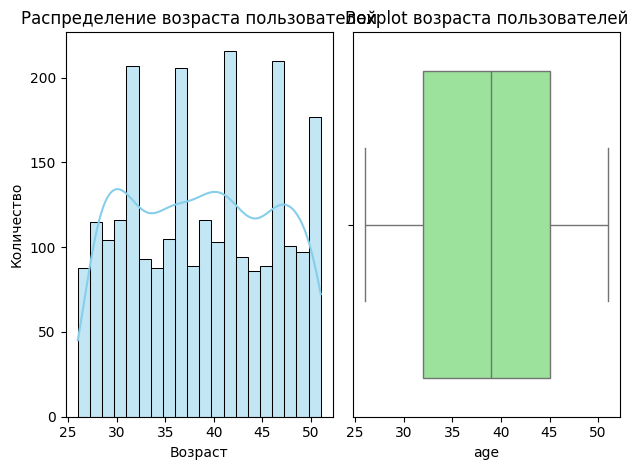

In [ ]:
# Гистограмма + KDE
plt.subplot(1,2,1)
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# Boxplot (для поиска выбросов)
plt.subplot(1,2,2)
sns.boxplot(x=data['age'], color='lightgreen')
plt.title('Boxplot возраста пользователей')

plt.tight_layout()
plt.show()

3 - изучить пол пользователей (визуализировать)

In [ ]:
# Подсчитаем количество пользователей по полу
gender_counts = data['gender'].value_counts()
print("Распределение пользователей по полу:")
print(gender_counts)

Распределение пользователей по полу:
gender
Female    1257
Male      1243
Name: count, dtype: int64


/tmp/ipython-input-2179356262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


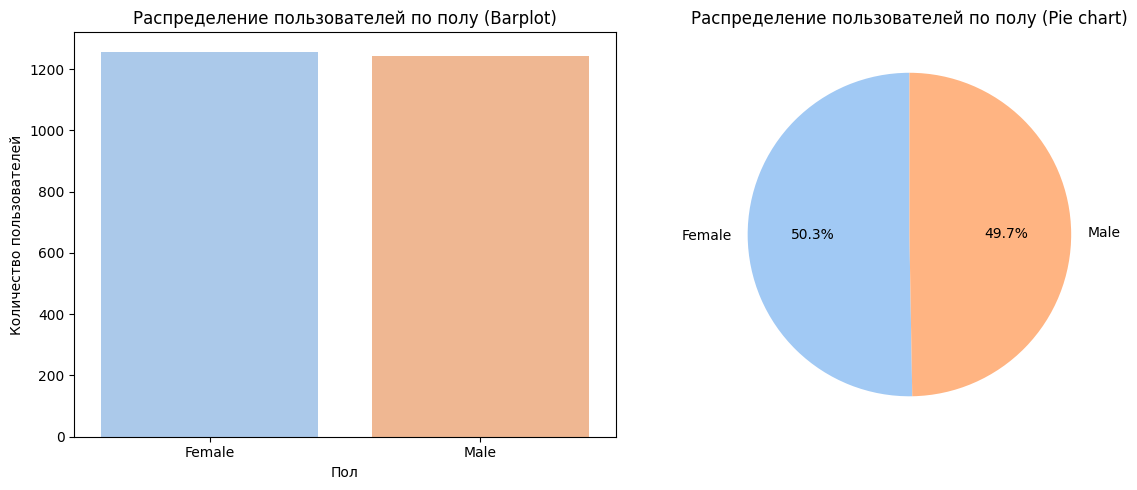

In [ ]:
# Визуализация: Barplot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Распределение пользователей по полу (Barplot)')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')

# Визуализация: Pie chart
plt.subplot(1,2,2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("pastel"))
plt.title('Распределение пользователей по полу (Pie chart)')

plt.tight_layout()
plt.show()

4 - изучить девайсы пользователей (визуализировать)

In [ ]:
# Посмотрим на количество пользователей по каждому устройству
device_counts = data['device'].value_counts()

print(device_counts)

device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


/tmp/ipython-input-823154442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="device", data=data, palette="Set2", order=device_counts.index)


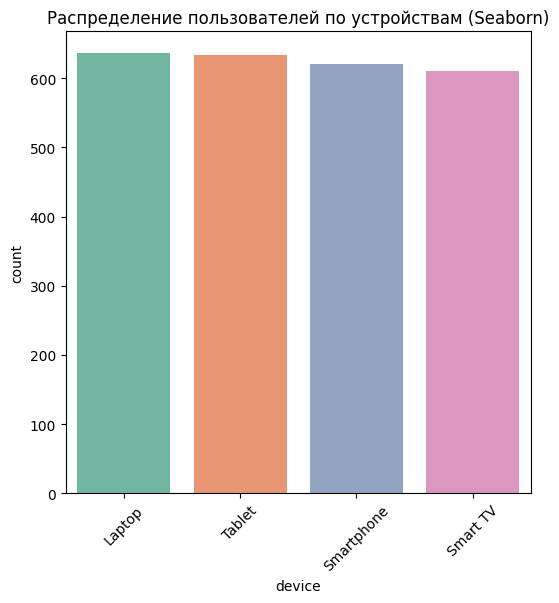

In [ ]:
# Визуализация
plt.figure(figsize=(6,6))
sns.countplot(x="device", data=data, palette="Set2", order=device_counts.index)
plt.title("Распределение пользователей по устройствам (Seaborn)")
plt.xticks(rotation=45)
plt.show()

5 - изучить тип подписки пользователей (визуализировать)

In [ ]:
# Подсчитаем количество пользователей по типу подписки
subscription_counts = data['subscriptionType'].value_counts()
print(subscription_counts)

subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


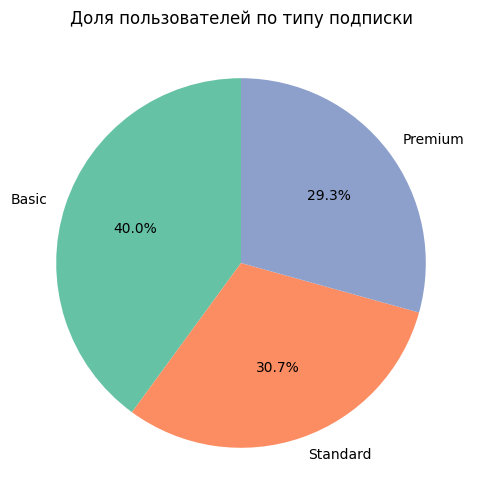

In [ ]:
# Круговая диаграмма
plt.figure(figsize=(6,6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.ylabel("")
plt.title("Доля пользователей по типу подписки")
plt.show()

6 - изучить локацию пользователей (визуализировать)

In [ ]:
# Подсчёт количества пользователей по странам
country_counts = data['country'].value_counts()
print(country_counts.head())  # топ-5 стран

country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Name: count, dtype: int64


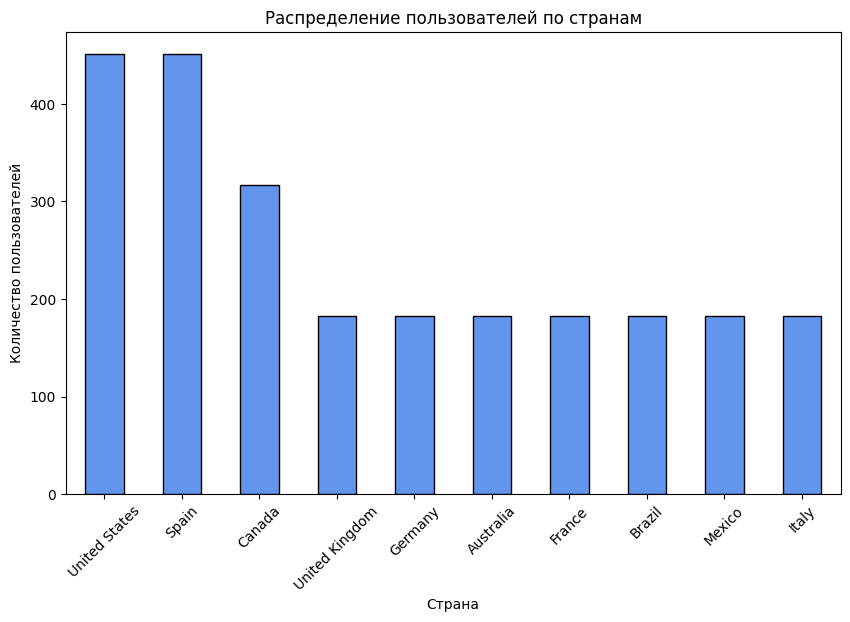

In [ ]:
# Гистограмма
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Распределение пользователей по странам")
plt.xlabel("Страна")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45)
plt.show()

7 - изучть динамику привлечения пользователей (Join Date)

In [ ]:
# Убедимся, что поле Join Date в формате даты
data['joinDate'] = pd.to_datetime(data['joinDate'])

In [ ]:
# Посмотрим динамику по месяцам
users_by_month = data.groupby(data['joinDate'].dt.to_period('M'))['userId'].nunique().reset_index()
users_by_month['joinDate'] = users_by_month['joinDate'].dt.to_timestamp()

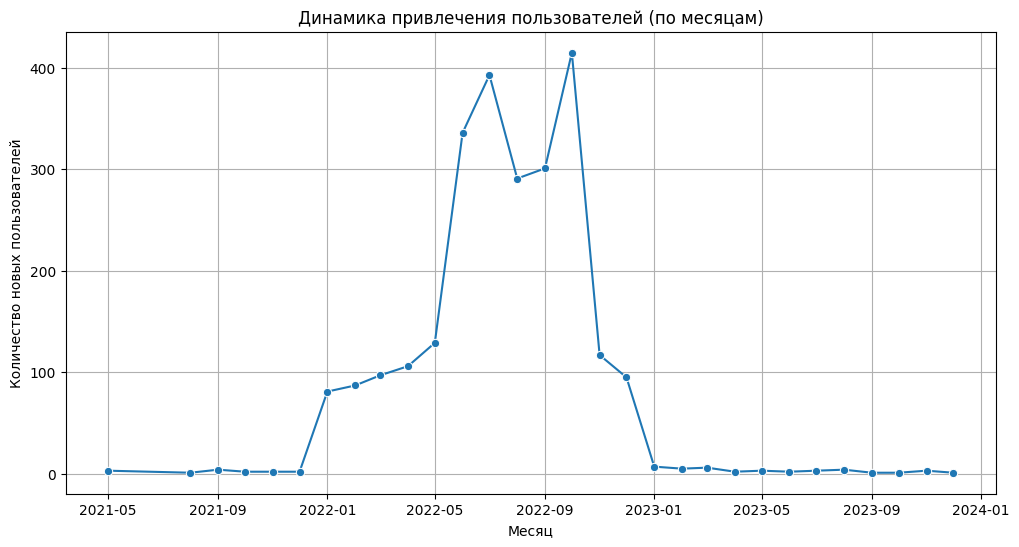

In [ ]:
# Построим график
plt.figure(figsize=(12,6))
sns.lineplot(data=users_by_month, x='joinDate', y='userId', marker="o")
plt.title("Динамика привлечения пользователей (по месяцам)")
plt.xlabel("Месяц")
plt.ylabel("Количество новых пользователей")
plt.grid(True)
plt.show()

8 - изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

In [ ]:
# Преобразуем даты
data['joinDate'] = pd.to_datetime(data['joinDate'])
data['lastPaymentDate'] = pd.to_datetime(data['lastPaymentDate'])

In [ ]:
# Функция для генерации списка месяцев подписки
def generate_months(row):
    return pd.date_range(start=row['joinDate'],
                         end=row['lastPaymentDate'],
                         freq='MS')  # MS = Month Start

In [ ]:
# Разворачиваем данные: каждая строка = платеж за месяц
expanded_list = []
for _, row in data.iterrows():
    months = generate_months(row)
    for m in months:
        expanded_list.append({
            'userId': row['userId'],
            'month': m,
            'monthlyRevenue': row['monthlyRevenue']
        })

expanded = pd.DataFrame(expanded_list)

In [ ]:
# Теперь группируем по месяцам
revenue_by_month = expanded.groupby('month', as_index=False)['monthlyRevenue'].sum()

In [ ]:
# Добавляем накопленную выручку
revenue_by_month['cumulativeRevenue'] = revenue_by_month['monthlyRevenue'].cumsum()

print(revenue_by_month.head())

       month  monthlyRevenue  cumulativeRevenue
0 2021-06-01              39                 39
1 2021-07-01              39                 78
2 2021-08-01              39                117
3 2021-09-01              51                168
4 2021-10-01              99                267


9 - разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [ ]:
# Определяем возрастные корзины
bins = [0, 19, 29, 39, 49, 100]  # диапазоны возрастов
labels = ['<20', '20-29', '30-39', '40-49', '50+']

In [ ]:
# Создаем новый столбец с возрастной категорией
data['ageGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

In [ ]:
# Группируем по возрастным корзинам и считаем суммарный доход
revenue_by_age = data.groupby('ageGroup')['monthlyRevenue'].sum().reset_index()

/tmp/ipython-input-2298542373.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = data.groupby('ageGroup')['monthlyRevenue'].sum().reset_index()


In [ ]:
# Находим самую платежеспособную группу
top_group = revenue_by_age.loc[revenue_by_age['monthlyRevenue'].idxmax()]

In [ ]:
print("Доход по возрастным группам:")
print(revenue_by_age)
print("\nСамая платежеспособная группа:")
print(top_group)

Доход по возрастным группам:
  ageGroup  monthlyRevenue
0      <20               0
1    20-29            3871
2    30-39           12747
3    40-49           12465
4      50+            2188

Самая платежеспособная группа:
ageGroup          30-39
monthlyRevenue    12747
Name: 2, dtype: object


10 - посмотреть зависимость типа тарифа от группы возраста пользователя

In [ ]:
# Определяем возрастные корзины
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

In [ ]:
# Добавляем колонку с возрастной группой
data['Age Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

In [ ]:
# Считаем количество пользователей по каждой возрастной группе и тарифу
tariff_by_age = data.groupby(['Age Group', 'subscriptionType'])['userId'].count().reset_index()

/tmp/ipython-input-3530915663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tariff_by_age = data.groupby(['Age Group', 'subscriptionType'])['userId'].count().reset_index()


In [ ]:
# Для удобства переименуем колонку
tariff_by_age.rename(columns={'userId': 'usersCount'}, inplace=True)
print(tariff_by_age)

   Age Group subscriptionType  usersCount
0        <20            Basic           0
1        <20          Premium           0
2        <20         Standard           0
3      20-29            Basic         123
4      20-29          Premium          98
5      20-29         Standard          86
6      30-39            Basic         419
7      30-39          Premium         293
8      30-39         Standard         308
9      40-49            Basic         388
10     40-49          Premium         290
11     40-49         Standard         318
12     50-59            Basic          69
13     50-59          Premium          52
14     50-59         Standard          56
15       60+            Basic           0
16       60+          Premium           0
17       60+         Standard           0


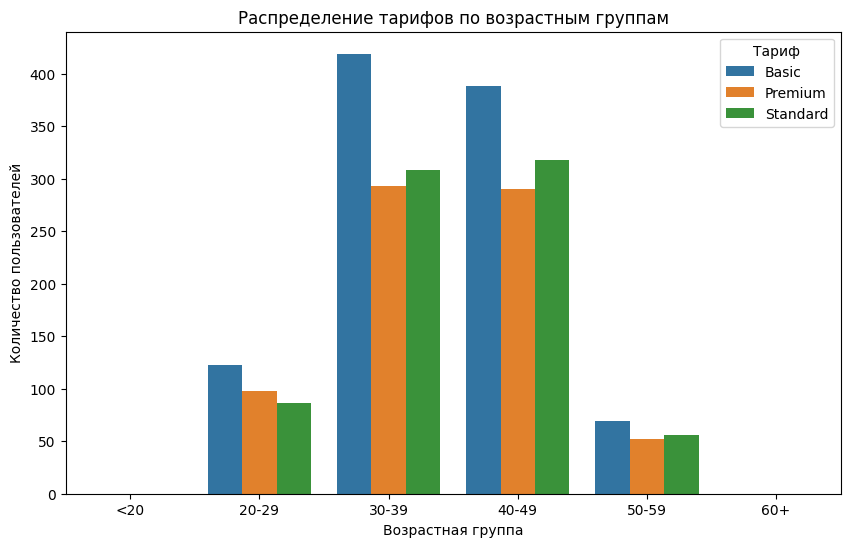

In [ ]:
# Визуализация: распределение тарифов по возрастным группам
plt.figure(figsize=(10,6))
sns.barplot(data=tariff_by_age, x='Age Group', y='usersCount', hue='subscriptionType')
plt.title('Распределение тарифов по возрастным группам')
plt.ylabel('Количество пользователей')
plt.xlabel('Возрастная группа')
plt.legend(title='Тариф')
plt.show()

11 - посмотреть зависимость типа тарифа от страны пользователя

In [ ]:
# Считаем количество пользователей по стране и тарифу
tariff_by_country = (
    data.groupby(['country', 'subscriptionType'])['userId']
    .count()
    .reset_index()
    .rename(columns={'userId': 'usersCount'})
)

print(tariff_by_country.head())

     country subscriptionType  usersCount
0  Australia            Basic          31
1  Australia          Premium         101
2  Australia         Standard          51
3     Brazil            Basic         146
4     Brazil          Premium          33


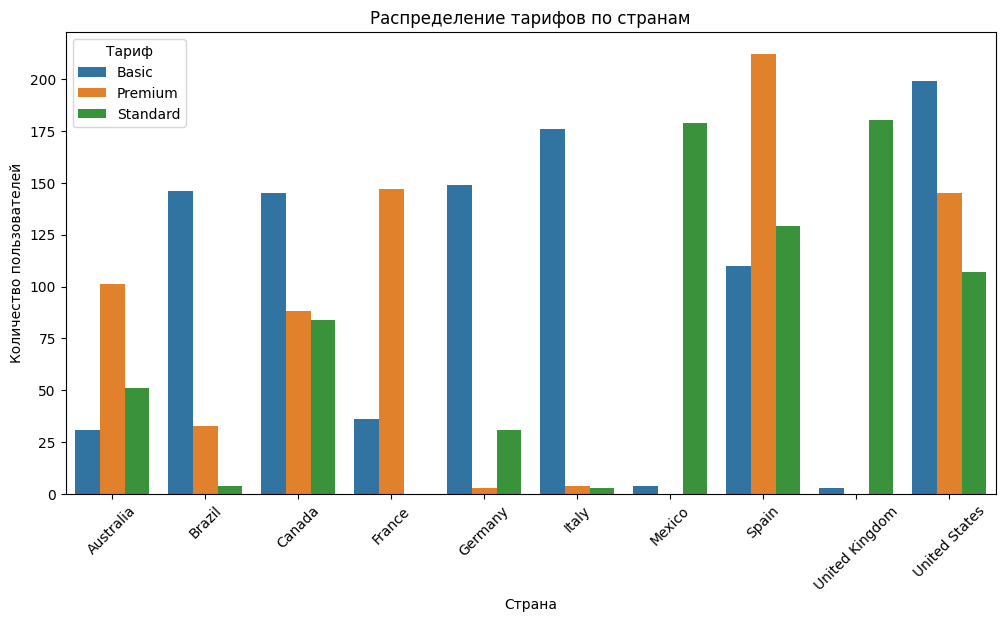

In [ ]:
# Визуализация: распределение тарифов по странам
plt.figure(figsize=(12,6))
sns.barplot(data=tariff_by_country,
            x='country', y='usersCount', hue='subscriptionType')
plt.title('Распределение тарифов по странам')
plt.ylabel('Количество пользователей')
plt.xlabel('Страна')
plt.xticks(rotation=45)
plt.legend(title='Тариф')
plt.show()